# Sea Ice example notebook for 2D maps

---


The class method `plot_2d_seaice` automatically adjusts the plotting settings based on the value of the `method` argument,  
which can be either `fraction` or `thickness`, depending on what the user want to analyse and plot. The class computes the monthly climatology of the dataset over the available time period.  

When method `fraction` is selected, it is possible to set `plot_ref_contour=True` to show the contour red line where the seaice fraction equals 20%.

The `plot_type` argument determines the type of figure produced:

- `var`: For each region, plots the fraction or thickness for all requested monthly climatologies (default: March and September [3,9]) across each model or reference dataset.
- `bias`: For each of the requested months, plots the reference data, the model output, and the bias map (model – reference).

In [1]:
from aqua.diagnostics import SeaIce, PlotSeaIce, Plot2DSeaIce

/LUMI_TYKKY_Z6kXmtP/miniforge/envs/env1/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


## Plot sea ice 2D maps: bias

### Plotting method: fraction

Set `method='fraction'` and `plot_type='bias'` to plot the sea ice fraction bias maps.  

As mentioned in the documentation, it is possible to provide a set of projections trough the `projkw` dictionary as in the example below (check documentation for 
all the available projections).  

In [ ]:
method   = 'fraction'   # This is the method we want to compute with the seaice data
varname  = 'siconc'     # This is the right variable name relative to the desired method for IFS-NEMO
source   = 'lra-r100-monthly' # source name can change depending on the model and exp
regions_domain = ['arctic','antarctic']
regrid='r100'
loglevel = 'info'

# Model data
seaice_model = SeaIce(model='IFS-NEMO', exp='historical-1990', source=source, regions=regions_domain, 
                      startdate='1991-01-01', enddate='2000-01-01', 
                      regrid=regrid, loglevel='info')
simod = seaice_model.compute_seaice(method=method, var=varname)

# Reference data
seaice_ref_nh = SeaIce(model='OSI-SAF', exp='osi-saf-aqua', source='nh-monthly', regions='arctic',
                       startdate='1991-01-01', enddate='2000-01-01', 
                       regrid=regrid, loglevel=loglevel)
si_ref_nh = seaice_ref_nh.compute_seaice(method=method, var=varname)

seaice_ref_sh = SeaIce(model='OSI-SAF', exp='osi-saf-aqua', source='sh-monthly', regions='antarctic',
                      startdate='1991-01-01', enddate='2000-01-01', 
                      regrid=regrid, loglevel=loglevel)
si_ref_sh = seaice_ref_sh.compute_seaice(method=method, var=varname)


2025-09-23 15:41:25 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-09-23 15:41:25 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-09-23 15:41:25 :: Fixer :: INFO     -> No fixer_name found, only convention will be applied
2025-09-23 15:41:25 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-09-23 15:41:25 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-09-23 15:41:25 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-09-23 15:41:31 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-09-23 15:41:31 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-09-23 15:41:31 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-09-23 15:41:31 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-09-23 15:41:31 :: Regridder :: IN

2025-09-23 15:39:56 :: Plot2DSeaIce :: INFO     -> Starting Plot2DSeaIce run
2025-09-23 15:39:56 :: Plot2DSeaIce :: INFO     -> Plotting region: Arctic
2025-09-23 15:40:06 :: Plot2DSeaIce :: INFO     -> Plotting region: Antarctic


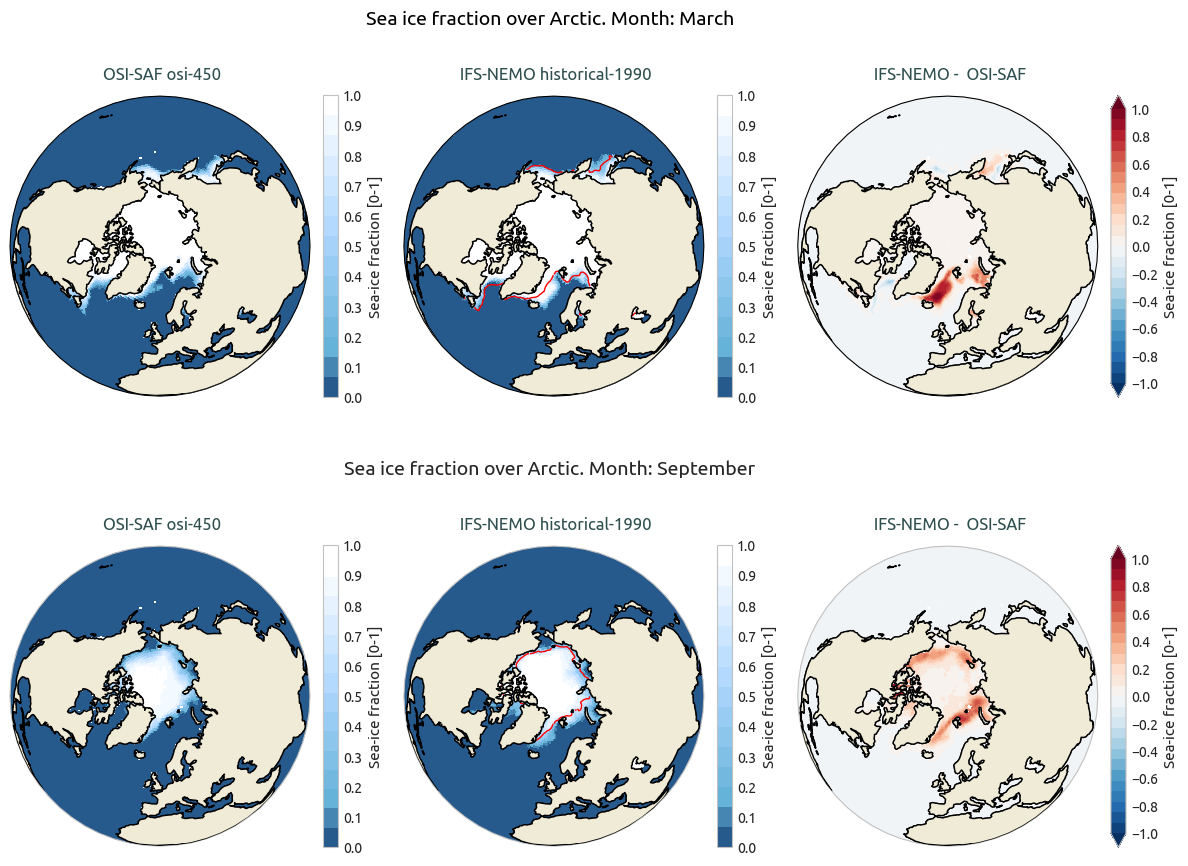

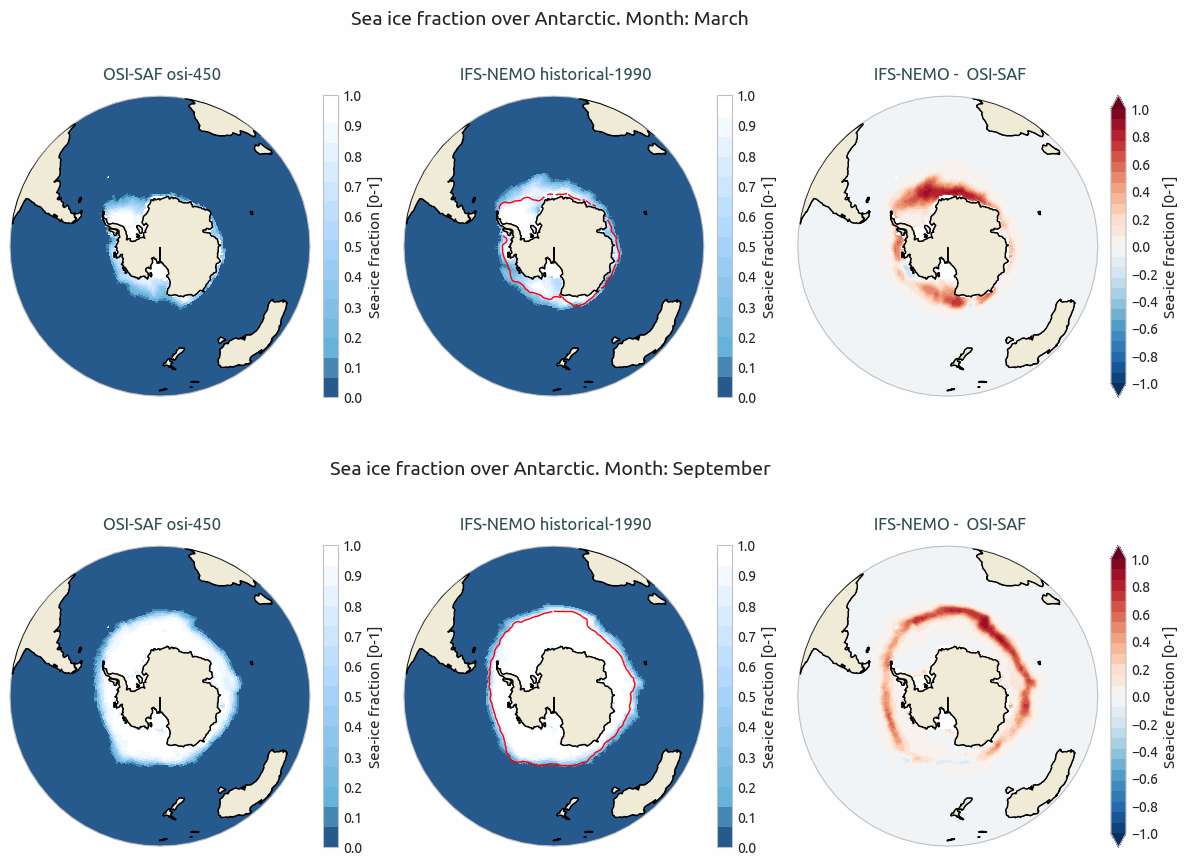

In [3]:
p2dsi = Plot2DSeaIce(models=simod,
                     ref=[si_ref_sh, si_ref_nh],
                     loglevel='info')

p2dsi.plot_2d_seaice(plot_type='bias', method='fraction',
                     projkw={'projpars':{'central_longitude':0.0,
                                         'central_latitude':'max_lat_signed'},
                             'projname':'orthographic'},
                     plot_ref_contour=True,
                     save_pdf=False, save_png=False)

#### Customised projections

In `projkw`, it is possible to set the lat-lon boundaries of the plotted regions, allowing for a refined 'zoom' of the desired area using the `extent_regions` parameter.

2025-09-23 15:40:15 :: Plot2DSeaIce :: INFO     -> Starting Plot2DSeaIce run
2025-09-23 15:40:15 :: Plot2DSeaIce :: INFO     -> Plotting region: Arctic
2025-09-23 15:40:19 :: Plot2DSeaIce :: INFO     -> Plotting region: Antarctic


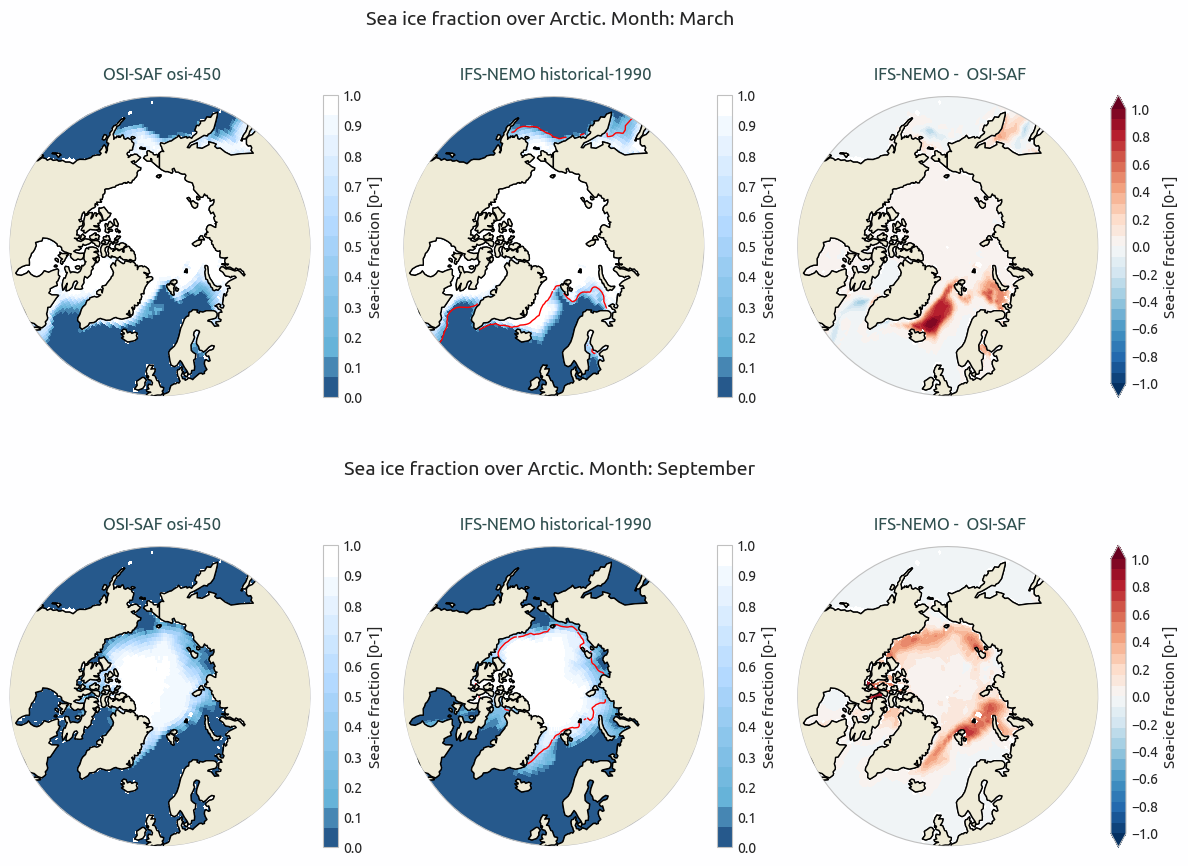

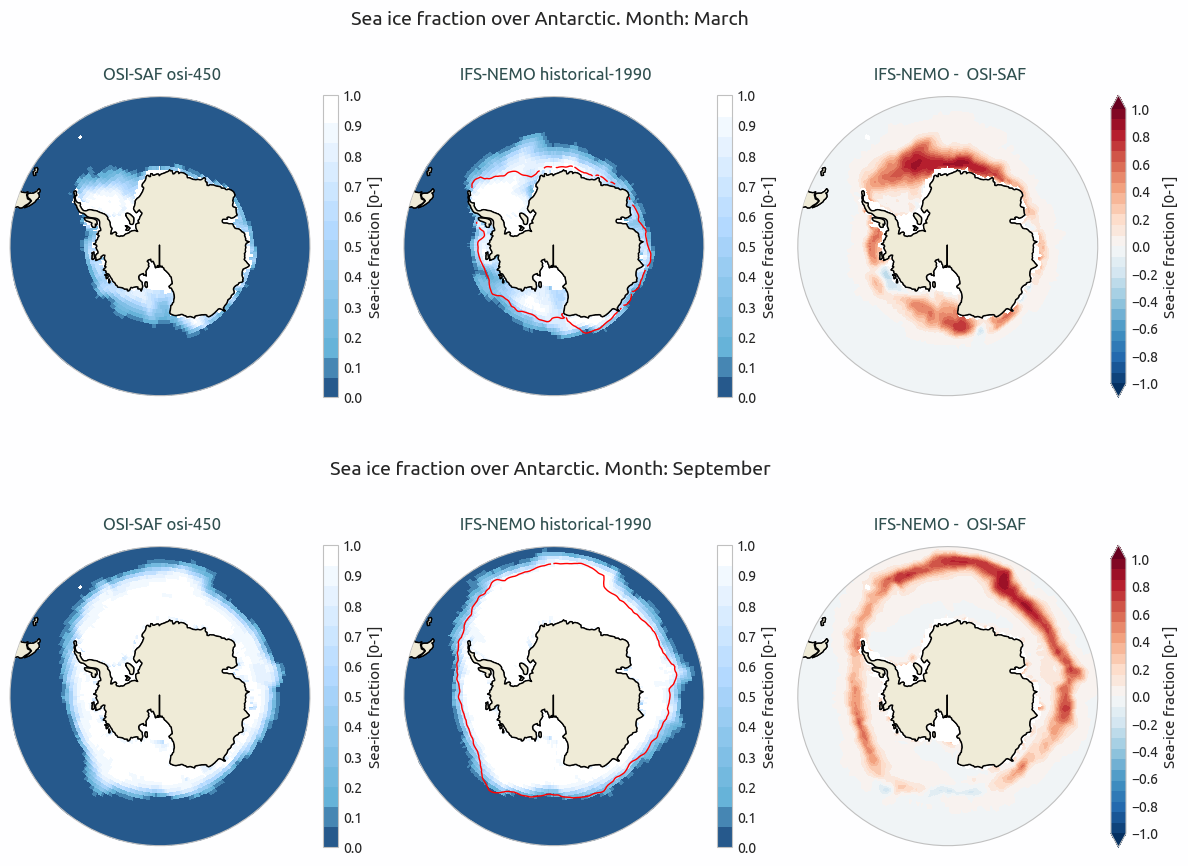

In [4]:
p2dsi = Plot2DSeaIce(models=simod,
                     ref=[si_ref_sh, si_ref_nh],
                     loglevel='info')

p2dsi.plot_2d_seaice(plot_type='bias', method='fraction',
                     projkw={'projpars':{'central_longitude':0.0,
                                         'central_latitude':'max_lat_signed'},
                             'extent_regions':{'Arctic':   [-180, 180, 50, 90],
                                               'Antarctic':[-180, 180, -50, -90]},
                             'projname':'azimuthal_equidistant'},
                     plot_ref_contour=True,
                     save_pdf=False, save_png=False)

### Plotting method: thickness

Set `method='thickness'` to plot the sea ice thickness and the bias maps.

In [5]:
method   = 'thickness'   # This is the method we want to compute with the seaice data
varname  = 'sithick'     # This is the right variable name relative to the desired method for IFS-NEMO
source   = 'lra-r100-monthly' # source name can change depending on the model and exp
regions_domain = ['arctic','antarctic']
regrid='r100'
loglevel = 'info'

# Model data
seaice_model = SeaIce(model='IFS-NEMO', exp='historical-1990', source=source, regions=regions_domain, 
                      startdate='1991-01-01', enddate='2000-01-01', 
                      regrid=regrid, loglevel='info')
simod = seaice_model.compute_seaice(method=method, var=varname)


# Reference data
varn = 'sivol'

seaice_ref_nh = SeaIce(model='PSC', exp='PIOMAS', source='monthly', regions='arctic',
                       startdate='1991-01-01', enddate='2000-01-01', 
                       regrid=regrid, loglevel=loglevel)
si_ref_nh = seaice_ref_nh.compute_seaice(method=method, var=varn)

seaice_ref_sh = SeaIce(model='PSC', exp='GIOMAS', source='monthly', regions='antarctic',
                      startdate='1991-01-01', enddate='2000-01-01', 
                      regrid=regrid, loglevel=loglevel)
si_ref_sh = seaice_ref_sh.compute_seaice(method=method, var=varn)

2025-09-23 15:40:27 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!


2025-09-23 15:40:28 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-09-23 15:40:28 :: Fixer :: INFO     -> No fixer_name found, only convention will be applied
2025-09-23 15:40:28 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-09-23 15:40:28 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-09-23 15:40:28 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-09-23 15:40:35 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-09-23 15:40:35 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-09-23 15:40:35 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-09-23 15:40:35 | smmregrid.GridInspect |     INFO -> Data is already an xarray Dataset or DataArray
2025-09-23 15:40:35 :: Regridder :: INFO     -> Using provided dataset as a grid path for 2d
2025-09-23 15:40:35 :: Regridder :: INFO     -> Grid name: lon-lat
2025-09

2025-09-23 15:40:38 :: Plot2DSeaIce :: INFO     -> Starting Plot2DSeaIce run
2025-09-23 15:40:38 :: Plot2DSeaIce :: INFO     -> Plotting region: Arctic
2025-09-23 15:40:42 :: Plot2DSeaIce :: INFO     -> Plotting region: Antarctic


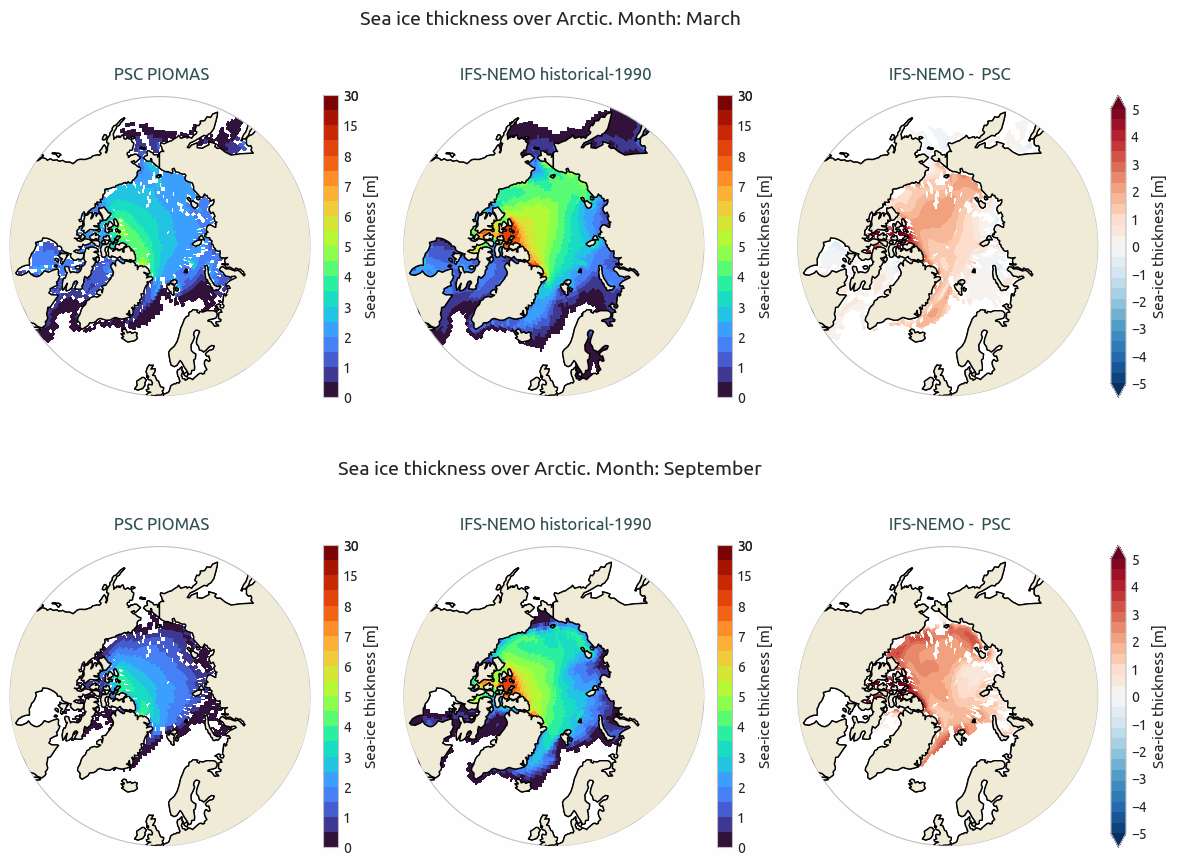

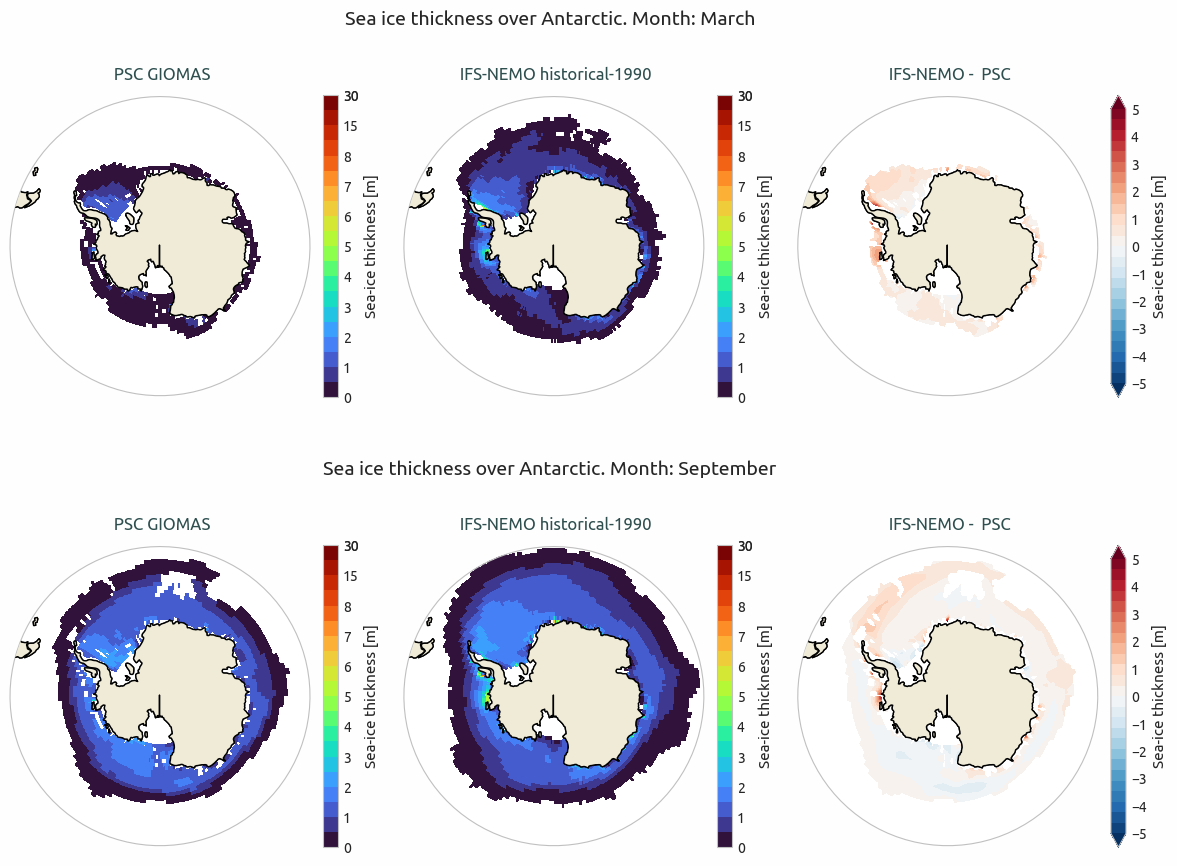

In [6]:
p2dsi = Plot2DSeaIce(models=simod,
                     ref=[si_ref_sh, si_ref_nh],
                     loglevel='info')
p2dsi.plot_2d_seaice(plot_type='bias', method='thickness',
                     projkw={'projpars':{'central_longitude':0.0,
                                         'central_latitude':'max_lat_signed'},
                             'extent_regions':{'Arctic':   [-180, 180, 50, 90],
                                               'Antarctic':[-180, 180, -50, -90]},
                             'projname':'azimuthal_equidistant'},
                     save_pdf=False, save_png=False)

## Plot sea ice 2D maps: var

Setting `plot_type='var'` will produce plot without the bias maps, with the aim to highlight the variability across the  
months of the year for each model/reference in each region.

In this example `months=[6,12]` (June, December) allow to choose the monthly climatologies for each model/reference to be plotted. 

2025-09-23 15:41:33 :: Plot2DSeaIce :: INFO     -> Starting Plot2DSeaIce run
2025-09-23 15:41:33 :: Plot2DSeaIce :: INFO     -> Plotting region: Arctic
2025-09-23 15:41:33 :: Plot2DSeaIce :: INFO     -> Processing reference data: sea_ice_fraction_arctic
2025-09-23 15:41:37 :: Plot2DSeaIce :: INFO     -> Processing model data: sea_ice_fraction_arctic
2025-09-23 15:41:42 :: Plot2DSeaIce :: INFO     -> Plotting region: Antarctic
2025-09-23 15:41:42 :: Plot2DSeaIce :: INFO     -> Processing reference data: sea_ice_fraction_antarctic
2025-09-23 15:41:45 :: Plot2DSeaIce :: INFO     -> Processing model data: sea_ice_fraction_antarctic


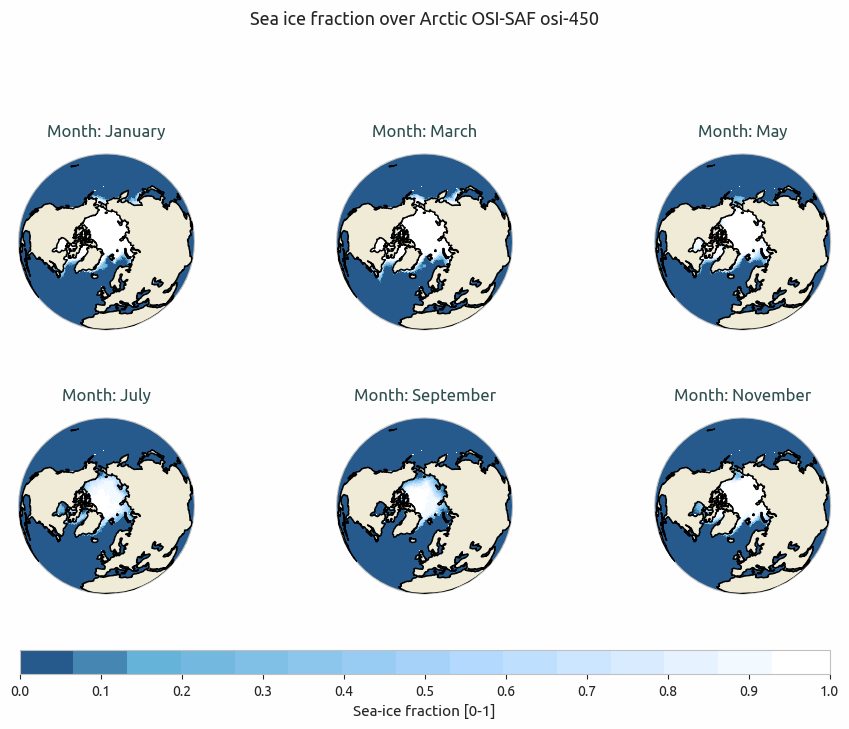

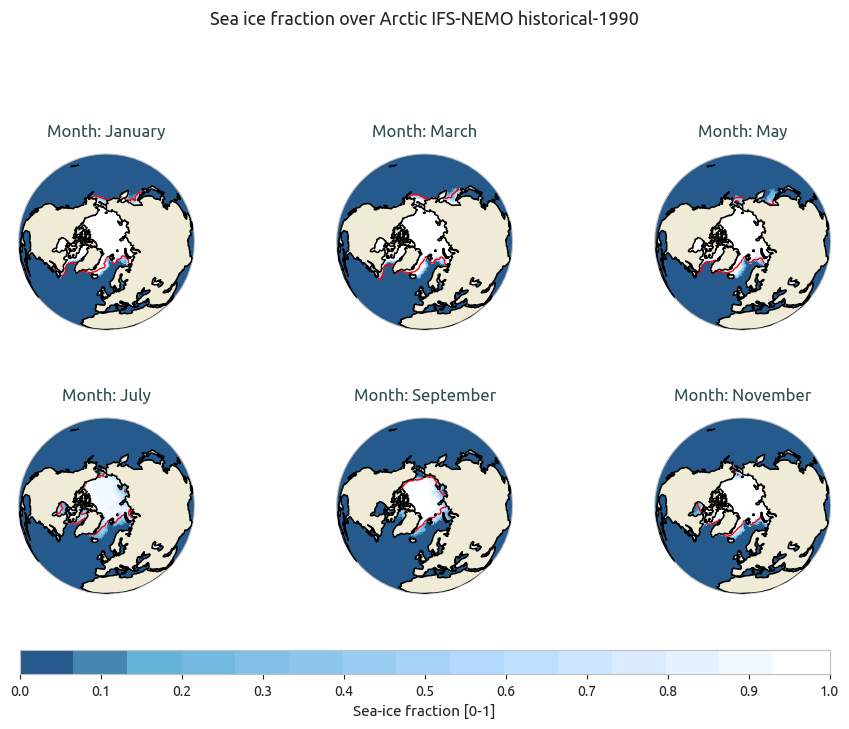

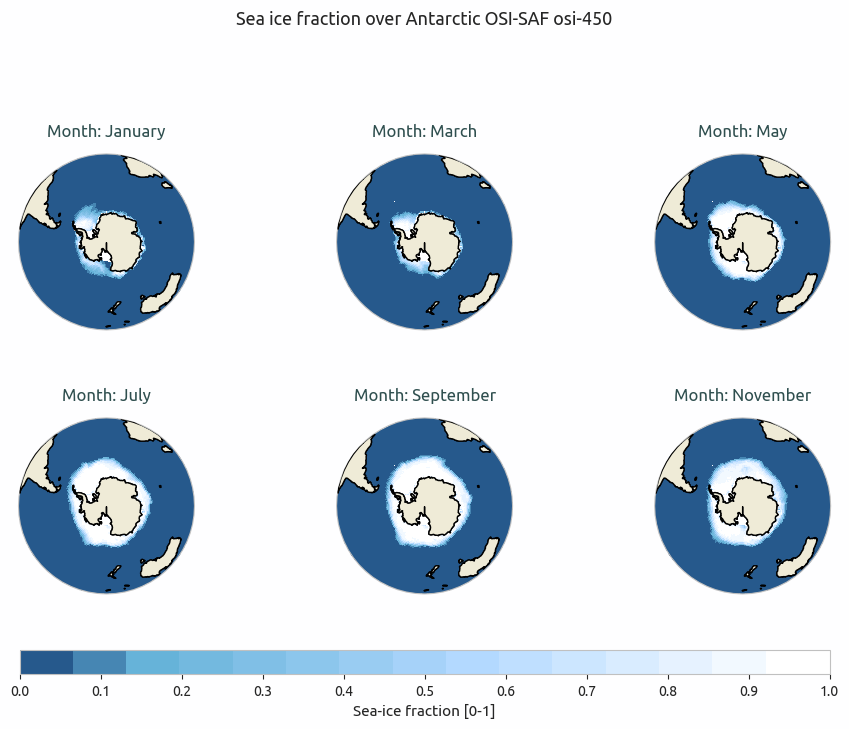

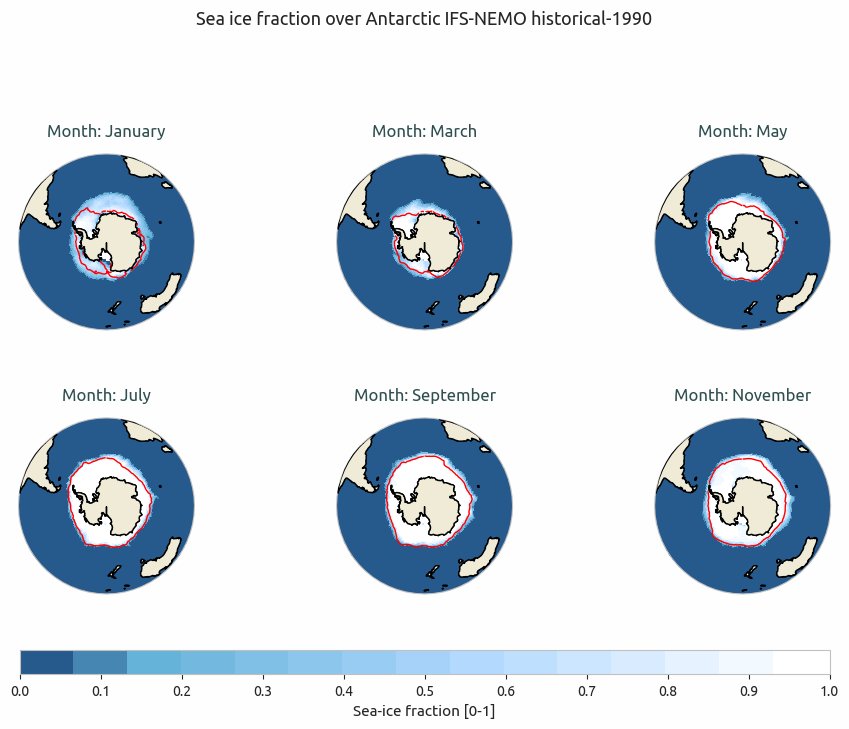

In [9]:
p2dsi = Plot2DSeaIce(models=simod,
                     ref=[si_ref_sh, si_ref_nh],
                     loglevel='info')
                     
p2dsi.plot_2d_seaice(plot_type='var', method='fraction',
                     projkw={'projname':'orthographic',
                             'projpars':{'central_longitude':0.0,
                                         'central_latitude':'max_lat_signed'}},
                     months=[1,3,5,7,9,11],
                     plot_ref_contour=True,
                     save_pdf=False, save_png=False)